<a href="https://colab.research.google.com/github/ILMNX/artificial-intelligence/blob/main/factory-production-fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pengaturan Produksi Pabrik Menggunakan Fuzzy Tsukamoto**

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=76fe42bb07eaafb4dd133db0910286779c2f26310f7db9ec02b5da9ec35ef83d
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [ ]:
# Definisi rentang untuk setiap variabel
x_persediaan = np.arange(0, 101, 1)
x_permintaan = np.arange(0, 101, 1)
x_produksi = np.arange(0, 101, 1)

In [ ]:
# Definisi fungsi keanggotaan untuk Persediaan
persediaan_sedikit = fuzz.trapmf(x_persediaan, [0, 0, 20, 40])
persediaan_cukup = fuzz.trimf(x_persediaan, [20, 50, 80])
persediaan_banyak = fuzz.trapmf(x_persediaan, [60, 80, 100, 100])

In [ ]:
# Definisi fungsi keanggotaan untuk Permintaan
permintaan_rendah = fuzz.trapmf(x_permintaan, [0, 0, 20, 40])
permintaan_sedang = fuzz.trimf(x_permintaan, [20, 50, 80])
permintaan_tinggi = fuzz.trapmf(x_permintaan, [60, 80, 100, 100])

In [ ]:
# Definisi fungsi keanggotaan untuk Produksi
produksi_sedikit = fuzz.trapmf(x_produksi, [0, 0, 25, 50])
produksi_sedang = fuzz.trimf(x_produksi, [25, 50, 75])
produksi_banyak = fuzz.trapmf(x_produksi, [50, 75, 100, 100])

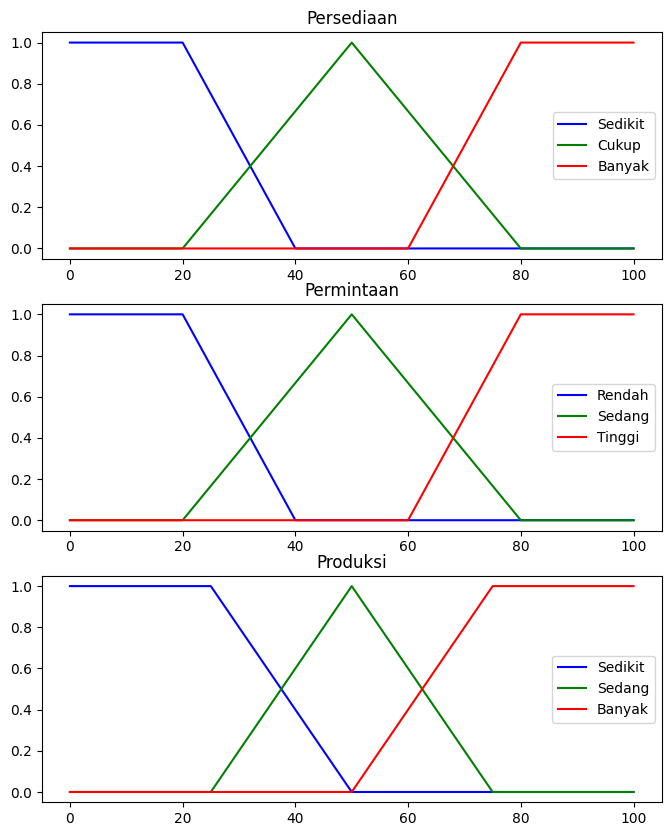

In [ ]:
# Bentuk visualisasi fungsi keanggotaan
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 10))

ax0.plot(x_persediaan, persediaan_sedikit, 'b', linewidth=1.5, label='Sedikit')
ax0.plot(x_persediaan, persediaan_cukup, 'g', linewidth=1.5, label='Cukup')
ax0.plot(x_persediaan, persediaan_banyak, 'r', linewidth=1.5, label='Banyak')
ax0.set_title('Persediaan')
ax0.legend()

ax1.plot(x_permintaan, permintaan_rendah, 'b', linewidth=1.5, label='Rendah')
ax1.plot(x_permintaan, permintaan_sedang, 'g', linewidth=1.5, label='Sedang')
ax1.plot(x_permintaan, permintaan_tinggi, 'r', linewidth=1.5, label='Tinggi')
ax1.set_title('Permintaan')
ax1.legend()

ax2.plot(x_produksi, produksi_sedikit, 'b', linewidth=1.5, label='Sedikit')
ax2.plot(x_produksi, produksi_sedang, 'g', linewidth=1.5, label='Sedang')
ax2.plot(x_produksi, produksi_banyak, 'r', linewidth=1.5, label='Banyak')
ax2.set_title('Produksi')
ax2.legend()

In [ ]:
# Axis layout dikosongkan
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [ ]:
# Fungsi Inferensi Fuzzy Tsukamoto
def inferensi_tsukamoto(persediaan, permintaan):
    # Inferensi
    rule1 = np.fmin(persediaan_sedikit[persediaan], permintaan_tinggi[permintaan])
    rule2 = np.fmin(persediaan_sedikit[persediaan], permintaan_sedang[permintaan])
    rule3 = np.fmin(persediaan_sedikit[persediaan], permintaan_rendah[permintaan])
    rule4 = np.fmin(persediaan_cukup[persediaan], permintaan_tinggi[permintaan])
    rule5 = np.fmin(persediaan_cukup[persediaan], permintaan_sedang[permintaan])
    rule6 = np.fmin(persediaan_cukup[persediaan], permintaan_rendah[permintaan])
    rule7 = np.fmin(persediaan_banyak[persediaan], permintaan_tinggi[permintaan])
    rule8 = np.fmin(persediaan_banyak[persediaan], permintaan_sedang[permintaan])
    rule9 = np.fmin(persediaan_banyak[persediaan], permintaan_rendah[permintaan])
    # Rule output
    produksi1 = np.fmin(rule1, produksi_banyak)
    produksi2 = np.fmin(rule2, produksi_sedang)
    produksi3 = np.fmin(rule3, produksi_sedikit)
    produksi4 = np.fmin(rule4, produksi_sedang)
    produksi5 = np.fmin(rule5, produksi_sedang)
    produksi6 = np.fmin(rule6, produksi_sedikit)
    produksi7 = np.fmin(rule7, produksi_sedang)
    produksi8 = np.fmin(rule8, produksi_sedikit)
    produksi9 = np.fmin(rule9, produksi_sedikit)

    # Agregasi semua output
    aggregated = np.fmax(produksi1,np.fmax(produksi2,np.fmax(produksi3, np.fmax(produksi4,np.fmax(produksi5,np.fmax(produksi6,np.fmax(produksi7,np.fmax(produksi8, produksi9))))))))

    # Defuzzifikasi
    defuzzified = fuzz.defuzz(x_produksi, aggregated, 'centroid')

    return defuzzified, aggregated


In [ ]:
# Contoh penggunaan
persediaan = 30
permintaan = 70
produksi, aggregated = inferensi_tsukamoto(persediaan, permintaan)
print(f'Persediaan: {persediaan}, Permintaan: {permintaan}, Tingkat Produksi: {produksi}')

Persediaan: 30, Permintaan: 70, Tingkat Produksi: 67.96435272045028


Persediaan: 30, Permintaan: 70, Tingkat Produksi: 67.96435272045028


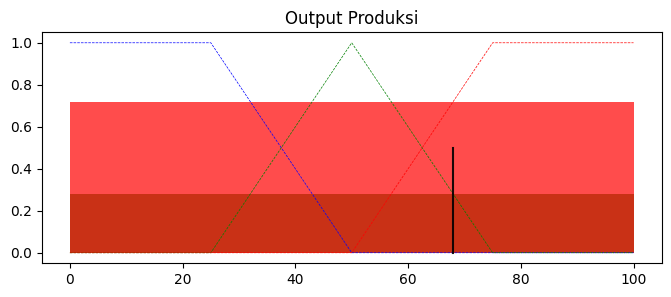

In [ ]:
# Visualisasi hasilnya
produksi_aktivasi_sedikit = fuzz.interp_membership(x_produksi, produksi_sedikit, produksi)
produksi_aktivasi_sedang = fuzz.interp_membership(x_produksi, produksi_sedang, produksi)
produksi_aktivasi_banyak = fuzz.interp_membership(x_produksi, produksi_banyak, produksi)

fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(x_produksi, produksi_sedikit, 'b', linewidth=0.5, linestyle='--')
ax.plot(x_produksi, produksi_sedang, 'g', linewidth=0.5, linestyle='--')
ax.plot(x_produksi, produksi_banyak, 'r', linewidth=0.5, linestyle='--')
ax.fill_between(x_produksi, 0, produksi_aktivasi_sedikit, facecolor='b', alpha=0.7)
ax.fill_between(x_produksi, 0, produksi_aktivasi_sedang, facecolor='g', alpha=0.7)
ax.fill_between(x_produksi, 0, produksi_aktivasi_banyak, facecolor='r', alpha=0.7)
ax.plot([produksi, produksi], [0, fuzz.interp_membership(x_produksi, aggregated, produksi)], 'k', linewidth=1.5, alpha=0.9)
ax.set_title('Output Produksi')

print(f'Persediaan: {persediaan}, Permintaan: {permintaan}, Tingkat Produksi: {produksi}')
